# MS 141 Lecture 8 

# Linear systems: Iterative methods

### Read: Heath's book, p. 467-482.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

# Set common figure parameters
newparams = {'figure.figsize': (10, 6), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 20}
plt.rcParams.update(newparams)

$$
\newcommand{\bb}{{\boldsymbol{b}}}
\newcommand{\bx}{{\boldsymbol{x}}}
\newcommand{\by}{{\boldsymbol{y}}}
\newcommand{\br}{{\boldsymbol{r}}}
$$

The *direct* methods we discussed in the previous lecture $-$ Gaussian elimination and $LU$ decomposition $-$ can find the exact solution of the linear system $A \bx = \bb$, subject only to rounding errors, using ${\cal O}(N^3)$ operations, where $N \times N$ is the size of the matrix $A$. Their computational cost and storage may be prohibitive for very large linear systems (say, $\,N>10,000$), and rounding error accumulation may also be significant. Different solution methods are desirable. 
   

*Iterative* methods are a different family of approaches to solve linear systems. They begin with an initial guess of the solution and successively improve it until the solution is as accurate as desired. The iterative algorithm terminates when some measure of the error, typically in the form of a residual, is as small as desired. Provided they converge rapidly enough, iterative methods have several advantages over direct methods, especially for large matrices. 

When successful, iterative methods can find a solution with computational cost of less that $\sim\mathcal{O}(N^2)$, with significant saving of computational cost and storage compared to direct methods. To achieve this goal, the key elements of an iterative methods are rapid convergence to the correct solution and a fast algorithm for computing each successive approximation. 

## 1. Stationary iterative methods

Starting from an initial guess $\bx^{(0)}$, iterative methods compute approximations $\bx^{(1)}, \bx^{(2)}, \dots, \bx^{(n)}$ which converge to the exact solution. The simplest iterative methods are called *stationary*. 
A stationary iterative scheme for solving $A\bx=\bb$ has the form

$$ \bx^{(k+1)} = G\bx^{(k)} + \mathbf{c} , $$

where the matrix $G$ and the vector $\mathbf{c}$ are constant over all iterations. 

Recall that a fixed point $\bx_0$ of a function is such that $f(\bx_0)=\bx_0$. To realize the iterative scheme, we want the fixed point of the function $f(\bx) = G\bx + \mathbf{c}$ to be a solution of $A\bx=\bb$. The standard approach to obtain a suitable matrix $G$ is by *splitting* the original matrix as

$$A = M - N,$$

where $M$ is nonsingular. The linear system becomes

$$M \bx = N \bx + \bb$$

which leads to the iterative scheme implementation:

$$\boxed {M \bx^{(k+1)} = N \bx^{(k)} + \bb,}$$

so that we solve a linear system with matrix $M$ at each iteration.

Formally, we can rewrite the approach as 

$$ \bx = M^{-1} N \bx + M^{-1}{\boldsymbol{b}},$$

and thus define $G = M^{-1}N$. The iterative scheme formally recasts the linear system into the problem of finding the fixed point of the multi-variable function $f(\bx) = M^{-1}N\bx + M^{-1}\bb$ with Jacobian matrix $G=M^{-1}N$.
In practice, because matrix inversion is impractical, the formula in the box above is implemented.

The intuition behind this approach is that if the matrix $M$ is diagonal or triangular, 
the linear system $M\bx = N \bx + \bb$ is easy to solve at each step and we obtain a fast algorithm. 
We want $M$ to have a simple form and approximate $A$ in some sense $-$ in the limit in which $M=A$, 
one re-obtains the original system. 

### Convergence

For stationary iteration to work, the sequence

$$\bx^{(k+1)} = M^{-1} \left( N \bx^{(k)} + {\boldsymbol{b}} \right), \quad k =
    0, 1, \dots$$

needs to approach the solution. *Convergence* to the exact solution depends on the matrix $G=M^{-1}N$. 
One can show that the stationary iterative method converges if and only if the eigenvalue of $G=M^{-1}N$ with the largest absolute value is less than 1 in magnitude:

$$\varrho (G) \equiv \max_i | \lambda_i | < 1.$$

If we view ${\boldsymbol{x}}^{(k)}$ as a vector in $N$-dimensional space, this requirement ensures that repeatedly multiplying by $G=M^{-1}N$ does not cause the result to diverge. An easier condition to check, which guarantees convergence, is that the matrix $A$ is *strictly diagonally dominant*.

In practice, convergence is checked by computing at each step the *residual*

$$ \mathbf{r}^{(k)} = \bb - A\,\bx^{(k)} $$

and requesting that its norm $\| \mathbf{r}^{(k)} \|$ falls below a certain threshold.

## 1.1 Jacobi Method

The simplest choice for the matrix splitting $A = M - N$ is to set $M$ equal to the diagonal of $A$. Let us define $D$ as the diagonal matrix with the same diagonal entries as $A$, while $A_L$ and $A_U$ are the strict lower and upper diagonal portions of $A$, respectively. The splitting $A = M - N$ becomes:

$$ M = D, \quad N = - \,(A_L + A_U) $$
 

If $A$ has no zero diagonal entries, so that $D$ is nonsingular, we obtain the iterative scheme known as the *Jacobi method*:

$$ \bx^{(k+1)} = D^{-1}(\,\bb - (A_L + A_U)\,\bx^{(k)}) $$

We can write this formula explicitly for the components of the solution vector $\bx^{(k+1)}$ at step $k+1$ in terms of the components of the solution vector at the previous step $k$:

$$ x_i^{(k+1)} = \frac{b_i - \sum_{j\ne i} a_{ij}\, x^{(k)}_j}{a_{ii}} $$

The Jacobi method is guaranteed to converge if the matrix is diagonally dominant by rows. However, the convergence of the Jacobi method is typically slow.

### Example 1: Small matrix

We implement the Jacobi method and use it to solve a linear system with a strictly diagonally dominant matrix:

$$A = \begin{pmatrix}
      -4 & 2 & 1 \\
       1 & 6 & 2 \\
       1 & -2 & 5 
    \end{pmatrix}
    \quad
    \bb = (1, 1, 1)
$$

with exact solution $\bx = (-4/3, 1/10, 4/15)^T$. 

We start with the initial guess $\bx^{(0)} = 0$, and compute the residual at each step.<br> 
When the absolute residual $\| \bb - A\bx^{(k)}\|$ falls below a certan threshold, the iteration is interrupted and we print out the result. 

In [3]:
def jacobi(A,b):

    N=len(b)
    assert(np.all(A.shape == (N, N)))
    
    x = np.zeros(N) 
    r = np.empty(0) # residual
    
    x_new = np.zeros_like(b)
    
    nstep = 100 # max steps
    eps = 1.e-6 #threshold
    
    for k in range(nstep):
        for i in range(N):
            
            x_new[i] = ( b[i] - (np.dot(A,x)[i] - A[i,i]*x[i]) ) / A[i,i]
       
        if (k < nstep-1): 
            #debug: print (x_new)
            x = np.copy(x_new)
        
        # Compute and store residual 
        residual = np.linalg.norm( b - np.dot(A,x_new) )
        r = np.append(r,residual)
        
        if (residual < eps):
            print ('Jacobi converged in ', k+1, 'steps')
            break
    
    if (k+1 == nstep):
        print ('Did not converge to desired threshold in ', nstep, ' steps')
    
    print ('Jacobi solution: ', x_new, '\n')
    # debug: print(r)
    # return residuals for plotting
    return r

Exact solution:  [-0.13333333  0.1         0.26666667] 

Jacobi converged in  22 steps
Jacobi solution:  [-0.13333319  0.09999996  0.26666676] 



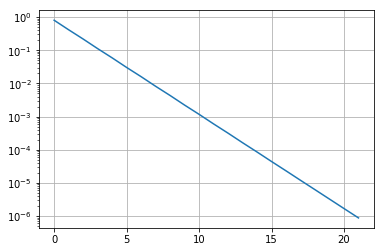

In [4]:
import scipy.linalg as la

A = np.array([[-4, 2, 1], \
              [1, 6, 2], \
              [1, -2., 5]])

b = np.array([1., 1, 1])

print ('Exact solution: ', la.solve(A,b), '\n')

r = jacobi(A,b)
plt.plot(r)
plt.yscale('log')
plt.ylabel=('Residual')
plt.show();

The residual error drops exponentially and $\sim$20 steps are sufficient to converge the result to within $10^{-6}$

### Example 2: Particle in a box

We apply the Jacobi method to calculating the *ground state wavefunction* of an electron in an infinite potential well of size $a$ (so-called "particle in a box" problem). We write the Schrodinger equation for this problem as:

$$ -\frac{\hbar^2}{2m} \frac{d^2\Psi(x)}{dx^2} - E_0\, \Psi(x) = 0$$

where $\Psi$ is the ground state wavefunction, $m$ the electron mass and $E_0$ its ground state energy $\frac{\hbar^2\pi^2}{2m a^2}$ ($\hbar$ is Planck's reduced constant). The boundary condition for this problem is that the wave function $\Psi$ vanishes at the two ends of the box. The Schrodinger equation is solved inside the box with a zero potential. 

We solve the equation numerically in the spatial region $0 \leq x \leq a$, in which we set up a spatial grid $x_n$ with $N$ points (and step size $h=a/N$) using the central second derivative formula:

$$ \left( \frac{d^2\Psi}{dx^2} \right)_n = \frac{ \Psi_{n+1} - 2 \Psi_n + \Psi_n}{h^2}$$

The values $\Psi_n = \Psi(x_n)$ of the wavefunction satisfy  

$$ \frac{ \Psi_{n+1} - 2 \Psi_n + \Psi_n }{h^2} + k^2 \Psi_n  = 0$$ 
where $k^2 = \frac{2m E_0}{\hbar^2} = \pi^2 / a^2$. We implement this equation as a homogeneous system $A\bx=0$ with a symmetric tridiagonal matrix with rows

$$ \Psi_{n+1} + (k^2 h^2 - 2) \Psi_n + \Psi_{n-1}  = 0$$

The boundary conditions are implicitly imposed in the first and last rows (we will come back to this point when we discuss ODEs).<br> 
The numerical solution is compared to the exact ground state wavefunction 

$$\Psi(x) = \left(\frac{2}{a}\right)^{1/2} \sin\left(\frac{\pi}{a}x \right) $$

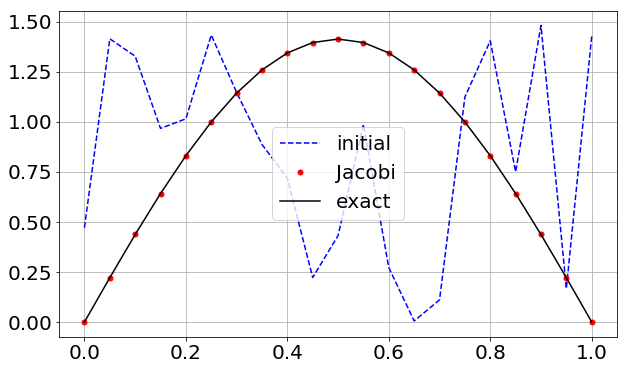

In [12]:
# Solving iteratively (-hbar^2 / 2m) Psi'' - E Psi = 0 in [0,a]

# constants (in atomic units: hbar = m = 1)
a = 1.0   # well size
N = 20    # Number of intervals 
h = a/N   # grid spacing
x = np.linspace(0,a,N+1) #N+1 grid points in the well region

# iteration steps
nstep = 4000

# initial wfn 
# random: 
psi0 = np.random.random(N+1) #100N steps

# constant:
#psi0 = np.ones(N+1) #~10N steps (nsteps=300 for N=50)

# normalize psi0
psi0 = psi0 / np.sqrt(np.sum(psi0**2)*h)

# working wfn arrays
psi = np.copy(psi0) # psi^(k)
psi_new = np.zeros_like(psi) # psi^(k+1)

# N x N matrix 
A = np.zeros([N+1,N+1])

# ground state energy 2m eo/hbar^2 (a=1)
k2 = np.pi**2 

for i in range(N+1):
    # Set the diagonals to k^2 h^2 - 2 (~ 2, diagonally dominant)
    A[i, i] = k2*(h**2) - 2.0 
    
    # Set the non-zero off-diagonals to 1
    if i > 0:
        A[i, i-1] = 1
    if i < N: 
        A[i, i+1] = 1

for k in range(nstep):
    for i in range(1,N):
        
        #(psi_new)_i = - (\sum_{j!=i}a_{ij}psi_j )/a_{ii}  (b=0 here) - A[i,i]*psi[i] 
        psi_new[i] = - ( np.dot(A,psi)[i] - A[i,i]*psi[i] ) / A[i,i]
        
    # normalize new solution
    psi_new = psi_new / np.sqrt( np.sum(psi_new**2)*h )
    psi = np.copy(psi_new)

psi_exact = np.sqrt(2)*np.sin(np.pi*x)
psi_exact /= np.sum(psi_exact**2)*h

# plot the solution

plt.plot(x,psi0,'b--', label='initial')
plt.plot(x,psi,'r.',label='Jacobi')
plt.plot(x,psi_exact,'k-',label='exact')

plt.xlabel=("$x$")
plt.ylabel=("$\Psi(x)$")

plt.legend()
plt.show();

## 1.2 Gauss-Seidel

One reason for the slow convergence of the Jacobi method is that it does not make use of the latest information available: the new components of $\bx^{(k+1)}$ (`x_new` in the algorithm above) are used only after the entire sweep has been completed. The *Gauss-Seidel method* remedies this drawback by using each new component of the solution as soon as it has been computed. 

The iteration scheme in Gauss-Seidel is:

$$ x_i^{(k+1)} = \frac{b_i - \sum_{j<i} a_{ij} x_j^{(k+1)} - \sum_{j>i} a_{ij} x_j^{(k)}}{a_{ii}} $$ 

Each component of $\bx^{(k+1)}$ in this iteration scheme is computed on the left before it is used on
the right. Written out in matrix form, this scheme is equivalent to:

\begin{align}
\bx^{(k+1)} &= D^{-1} (\bb - A_L\bx^{(k+1)} - A_U\bx^{(k)}) \\ 
            &= (D+A_L)^{-1} (\bb - A_U \bx^{(k)})
\end{align}

Therefore, in Gauss-Seidel we still express the original matrix as $A = D + (A_L + A_U)$, 
but now split $A = M - N$ using

$$\begin{aligned}
    M & = D + A_L, \\
    N & = - A_U.
  \end{aligned}$$

The Gauss-Seidel method converges faster than Jacobi and with less stringent conditions. If the matrix $A$ is symmetric and positive definite, the Gauss-Seidel method will converge. In addition to faster convergence, another benefit of the Gauss-Seidel method is that duplicate storage is not needed for the solution vector $\bx$ since the newly computed component values can overwrite the old ones immediately. This may be convenient for a large matrix, although not always possible to implement in a parallel algorithm.

The convergence of the Gauss-Seidel method can be accelerated by a technique called **successive over-relaxation** (SOR), in which the next iterate $\bx^{(k+1)}$ is taken as a weighted average of the current iterate and the next Gauss-Seidel step:

$$ \bx^{(k+1)} = (1-\omega)\,\bx^{(k)} + \omega \bx^{(k+1)} $$

where $\omega$ is a fixed parameter chosen to accelerate the convergence. Taking weighted averages of the current and next step is a common technique in iterative numerical methods. Convergence of the SOR method depends in a non-trivial way on the value of $\omega$ and its benefits for faster convergence are typically not known a priori. The optical value of $\omega$ is usually found by trial-and-error.

Below we implement the Gauss-Seidel approach and apply it to the matrix in Example 1 above.

In [10]:
def gauss_seidel(A,b):

    N=len(b)
    assert(np.all(A.shape == (N, N)))
    
    x = np.zeros(N) 
    r = np.empty(0) # residual
    
    # we will not take advantage of storage benefits here
    x_new = np.zeros_like(b)
    
    nstep = 100
    eps = 1.e-6 #threshold
    
    for k in range(nstep):
        for i in range(N):
            
            # x^(k+1)=  b  - \sum_j<i a_ij x^(k+1)_j - \sum_j>i a_ij x^(k)_j
            x_new[i] = ( b[i] - np.sum(A[i,:i]*x_new[:i]) - np.sum(A[i,i+1:]*x[i+1:]) ) / A[i,i]
            
        if (k < nstep-1): 
            #debug: print (x_new)
            x = np.copy(x_new)
        
        # Compute and store residual 
        residual = np.linalg.norm( b - np.dot(A,x_new) )
        r = np.append(r,residual)
        
        if (residual < eps):
            print ('Gauss-Seidel converged in ', k+1, 'steps')
            break
    
    if (k+ 1 == nstep):
        print ('Did not converge to desired threshold in ', nstep, ' steps')
    
    print ('Gauss-Seidel solution: ', x_new, '\n')
    # debug: print(r)
    # return residuals for plotting
    return r

Exact solution:  [-0.13333333  0.1         0.26666667] 

Gauss-Seidel converged in  16 steps
Gauss-Seidel solution:  [-0.13333327  0.09999996  0.26666664] 



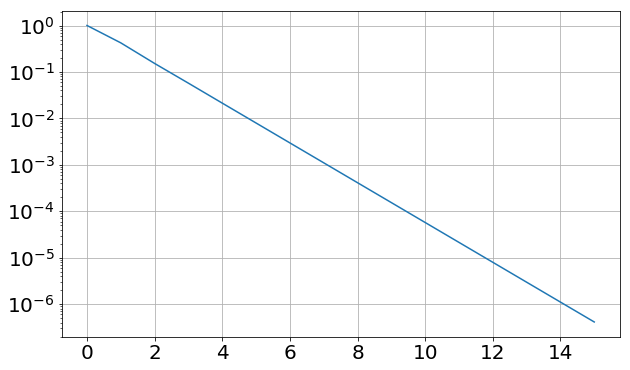

In [11]:
import scipy.linalg as la

A = np.array([[-4, 2, 1], \
              [1, 6, 2], \
              [1, -2., 5]])

b = np.array([1., 1, 1])

print ('Exact solution: ', la.solve(A,b), '\n')

r = gauss_seidel(A,b)
plt.plot(r)
plt.yscale('log')
plt.ylabel=('Residual')
plt.show();

Gauss-Seidel converged in 16 steps versus 22 for Jacobi for the same matrix.

## 2. Conjugate gradient

The Conjugate Gradient (CG) method is the most popular iterative method for solving large *sparse* systems of linear equations. CG is applicable to systems of the form $A\bx = \bb$, where $A$ is a square, symmetric, positive-definite (or positive-indefinite) matrix. These systems arise in a wide range of calculations, such as finite difference and finite element methods for solving partial differential equations, structural analysis, circuit analysis, etc.

Iterative methods like CG are suited for use with sparse matrices. If the matrix is dense, it is usually better to factor it and solve the equation by back substitution. The time spent factoring a dense matrix is roughly equivalent to the time spent solving the system iteratively; on the other hand, most iterative methods are memory-efficient and run quickly with sparse matrices.

A detailed derivation and implementation of the approach is beyond the scope of this course, but we will outline some basic ideas. A great introduction to CG is provided by the paper "An Introduction to
the Conjugate Gradient Method Without the Agonizing Pain" by J. R. Shewchuck. As the title suggests, CG is not trivial to understand. The [Wikipedia article on CG](https://en.wikipedia.org/wiki/Conjugate_gradient_method) is also an excellent reference.

If the matrix $A$ is symmetric ($\,A=A^T$) and positive definite (so that $\bx^TA\bx >0$ for all $\bx \ne 0$), as we assumed, the solution of $A\bx=\bb$ is the vector that minimizes the quadratic form

$$ f(\bx) = \frac{1}{2}\bx^T A \bx - \bb^T\bx. $$

One can verify this result by calculating $d\,f(\bx)\,/\,d\bx = 0$, whose solution satisfies the system $A\bx = \bb$. This intuition turns the problem of solving an $N \times N$ linear system into an *optimization problem*: finding the minimum of a function in $N$-dimensions. 

The CG method is an improvement of the Steepest Descent (SD) approach, in which one finds the minimum by iteratively searching along the direction of the negative gradient. Let us switch to a subscript notation to indicate the step number. The negative gradient of $f$ at a point $\bx_k$ is equal to the residual at that point, $-\nabla f (\bx_k)= \bb - A \bx_k = \br_k$. 

In SD, at step $k$ we search for a local minimum along the direction $\mathbf{r}_k$ of the negative gradient, thus defining the next iterate as: 

$$ \bx_{k+1} = \bx_k + \alpha_k\, \br_k. $$

The value of $\alpha_k$ determines how big a step we should take in the direction of the negative gradient. Obviously, we want to move to the point where the function $f$ takes on a minimum value, which is where the directional derivative is zero. Therefore, we compute the minimum along the search direction $\mathbf{r}_k$ using

$$ \frac{d}{d\alpha_k}\, f(\bx_{k+1}) = \nabla f(\bx_{k+1})^T \cdot \br_{k} = 0,$$

which means that the step should be taken so that the gradient at $\bx_{k+1}$ should be orthogonal to the negative gradient at $\bx_k$. This means that consecutive search directions are orthogonal by construction. Solving the equation above, we obtain:

$$\alpha_k = \frac{\br_k^T \br_k}{\br_k^T A\, \br_k}.$$

Using this value, one finds the next iterate as $\bx_{k+1} = \bx_k + \alpha_k\, \br_k$, and the process continues until the extremum has been determined within a chosen accuracy. 

Note that in SD the search directions are just the residual vectors at each step. In multi-dimensional solution space, the sequence $\bx_k$ defines a path, which, if the SD method is effective, should lead to the global minimum of $f(\bx)$, and therefore to the solution of $A\bx = \bb$. The SD approach can lead to a long and non-optimal zig-zag path toward the minimum and an inefficient optimization process (see the figure below; source: Wiki).
 
In CG, the search process is optimized by constructing directions $\mathbf{s}_k$ that are "conjugate" or "A-orthogonal" to all previous search directions.<br> 
Two vectors $\mathbf{u}$ and $\mathbf{v}$ are conjugate or A-orthogonal if they satisfy $\mathbf{u}^T A \mathbf{v} = 0$. The first step in CG is identical to SD and initial search direction is chosen as the residual: $\mathbf{s}_{0} = \br_0 = \bb - A\bx_0$. However, subsequent search directions $\mathbf{s}_k$ are chosen to be conjugate to all previous search directions, including the first, which was the negative gradient; hence the name conjugate gradient. 

Translated into equations, this means that $\mathbf{s}^T_{k+1}\, A\, \mathbf{s}_{i} = 0$ for all $i < k+1$. 
To fulfill this requirement (see Wiki for the proof), we use the update

$$ \bx_{k+1} = \bx_k + \alpha_k\, \mathbf{s}_k\,, \quad \text{with} \quad \alpha_k = \frac{\br_k^T \br_k}{\mathbf{s}_k^T A\, \mathbf{s}_k}$$. 

The figure below shows that CG (red path) avoids non-optimal steps in SD (green) by ensuring that all steps are, by constrution, $A$-orthogonal.<br> 
A CG algorithm is given below (see the [Wikipedia article on CG](https://en.wikipedia.org/wiki/Conjugate_gradient_method) for a derivation).

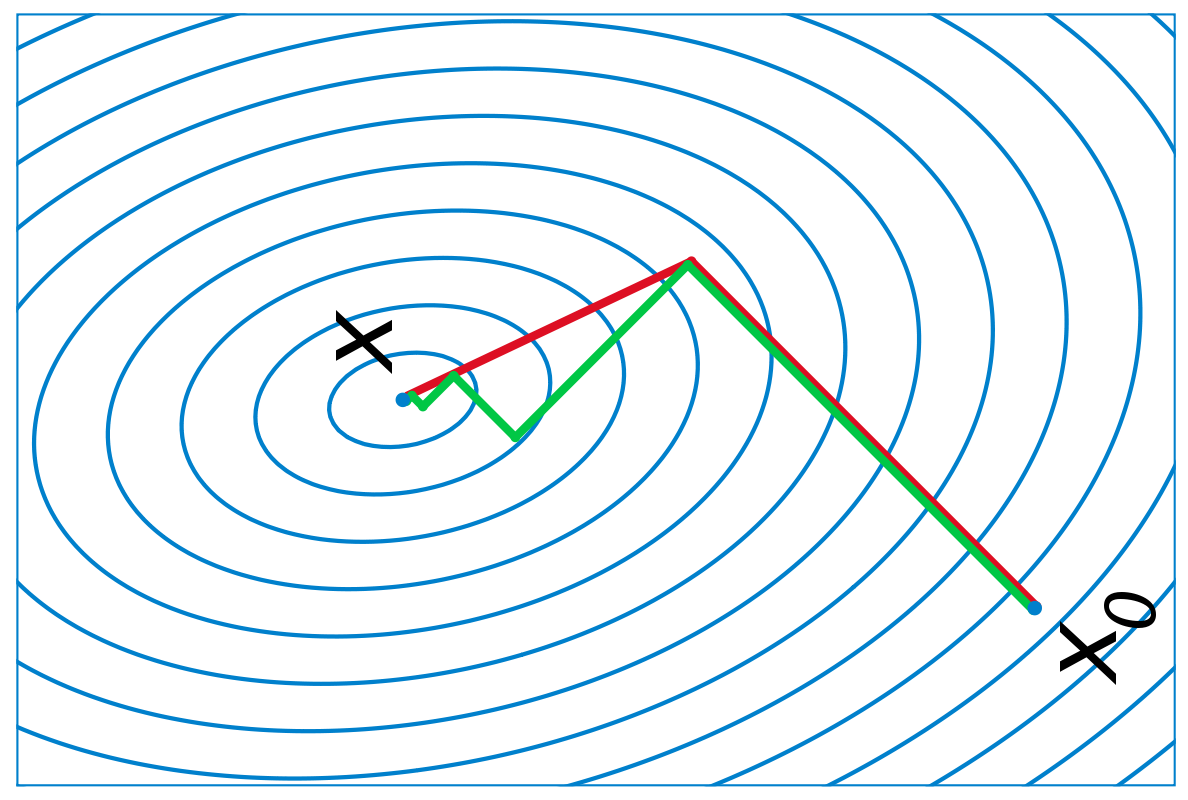

In [1]:
from IPython.display import Image
Image('CG-vs-SD.png', width=500)

\begin{aligned}
&\mathbf {r} _{0}:=\mathbf {b} -\mathbf {Ax} _{0}\\
&{\hbox{if }}\mathbf {r} _{0}{\text{ is sufficiently small, then return }}\mathbf {x} _{0}{\text{ as the result}}\\
&\mathbf {s} _{0}:=\mathbf {r} _{0}\\&k:=0\\
&{\text{repeat}}\\
&\qquad \alpha _{k}:={\frac {\mathbf {r} _{k}^{\mathsf {T}}\mathbf {r} _{k}}{\mathbf {s} _{k}^{\mathsf {T}}\mathbf {As} _{k}}}\\
&\qquad \mathbf {x}_{k+1}:=\mathbf {x} _{k}+\alpha _{k}\mathbf {s} _{k}\\
&\qquad \color{red}{\mathbf {r}_{k+1}:=\mathbf {r} _{k}-\alpha _{k}\mathbf {As} _{k}}\\
&\qquad {\hbox{if }}\mathbf {r}_{k+1}{\text{ is sufficiently small, then exit loop}}\\
&\qquad \beta _{k}:={\frac {\mathbf {r} _{k+1}^{\mathsf {T}}\mathbf {r} _{k+1}}{\mathbf {r} _{k}^{\mathsf {T}}\mathbf {r} _{k}}}\\
&\qquad \mathbf {s} _{k+1}:=\mathbf {r} _{k+1}+\beta _{k}\mathbf {s} _{k}\\
&\qquad k:=k+1\\&{\text{end repeat}}\\
&{\text{return }}\mathbf {x} _{k+1}{\text{ as the result}}
\end{aligned}

We implement this CG algorithm below and apply it to a $3\times3$ symmetric matrix, 
and compare the number of steps to convergence with the Jacobi and Gauss-Seidel methods. We find that CG obtains the correct result in much fewer steps.   

In [13]:
def conjgrad(A,b):
    
    #checks 
    N = len(b)
    assert(np.all(A.shape == (N, N)))
    
    #x = np.array([1.,0,0]) 
    x = np.zeros(N)
    x = np.random.random(N)
    
    r = np.zeros_like(b) 
    s = np.zeros_like(b)
    
    eps = 1.e-6
    
    # step 0: residual = search direction
    r = b - np.dot(A,x) 
    s = np.copy(r)
    
    res_old = np.linalg.norm(r)**2

    # max steps = size matrix + 1
    for k in range(N+1):
        
        As = np.dot(A,s)
        alpha = res_old / ( np.dot(s,As) )
        x = x + alpha * s
        r = r - alpha * np.dot(A,s)
        res_new = np.linalg.norm(r)**2
        
        if (np.sqrt(res_new) < eps):
            print ('CG converged in ', k+1, ' steps')
            break
            
        s =  r + (res_new / res_old) * s 
        res_old = res_new
        #debug: print (x)
    
    if (k == N):
        print ('Did not converge to desired threshold in ', N, ' steps')
        
    print ('CG solution: ', x, '\n')
    return x    

In [14]:
import scipy.linalg as la

A = np.array([[-4., 1, 1], \
              [1, 6, 2], \
              [1, 2, 5]])

b = np.array([1., 1, 1])

print ('Exact solution: ', la.solve(A,b), '\n')

conjgrad(A,b)
jacobi(A,b);

Exact solution:  [-0.17117117  0.13513514  0.18018018] 

CG converged in  3  steps
CG solution:  [-0.17117117  0.13513514  0.18018018] 

Jacobi converged in  12 steps
Jacobi solution:  [-0.17117128  0.13513521  0.18018007] 



### Why is CG so effective?
The answer is quite subtle. Formally, by applying the matrix $A$ to determine the next residual and search direction (step in red above), one constructs the Krylov space of the matrix $A$, namely the space spanned by $\{A \bx_0$, $A^2 \bx_0$, $A^3 \bx_0$, $\ldots \}$. After $m$ steps, one has generated a Krylov subspace of dimension $m$, making an optimal use of the steps. The method is guaranteed to converge in $N$ steps as at that point the search vectors have spanned the entire $N$-dimensional space. This is a huge advantage compared to direct methods, which require $N^3$ operations. 

CG is particularly well suited for sparse matrices, in which one may not even build the entire matrix and would rather just store its non-zero entries. In this scenario, direct methods such as $LU$ decomposition are not suitable as the matrix is not available and has many zero entries. All the CG algorithm requires is to repeatedly apply $A$ to a vector, and thus it relies entirely on vector-matrix multiplications, which are fast for sparse matrices.

## 3. Software for iterative linear algebra methods

A [list of available linear algebra libraries](https://public.lanl.gov/hall/Linear_Algebra_Software_mn.html) is maintained by Los Alamos National Lab. There is also a [Wiki comparison of linear algebra libraries](https://en.wikipedia.org/wiki/Comparison_of_linear_algebra_libraries).<br> 

Most libraries focus on decomposition methods for dense matrices. Some libraries also implement operations for sparse matrices.<br> 
The [LIS library](https://www.ssisc.org/lis/#applications) implements a wide range of iterative solvers and sparse matrix operations.